**Importing the libraries**



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings(action='ignore')

**Read the Dataset**

In [4]:
data=pd.read_csv('/content/fetalhealth.csv')


In [5]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
data.shape

(2126, 22)

**Data Preparation**
   1.**Handling Missing Values**:



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

2.**Handling Imbalance Data**

In [9]:
#Evaluating the target and find out if our data is imbalanced or not
data['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

<Axes: xlabel='fetal_health', ylabel='count'>

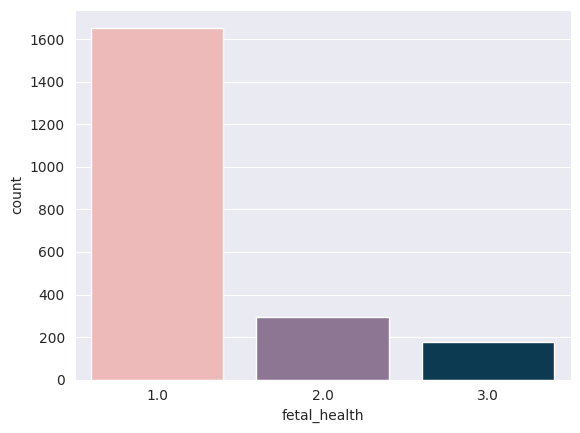

In [10]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health",palette=colours)

# **Descriptive Statistics**
Descriptive analysis is to study the basic features of data with the statistical process. Here pandas has a worthy function called describe.With this describe function we can understand the unique, top and frequent values of categorical features. And we can find mean, std, min, max and percentile values of continuous features.

In [11]:
data.describe().T.style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.000000,133.303857,9.840844,106.000000,126.000000,133.000000,140.000000,160.000000
accelerations,2126.000000,0.003178,0.003866,0.000000,0.000000,0.002000,0.006000,0.019000
fetal_movement,2126.000000,0.009481,0.046666,0.000000,0.000000,0.000000,0.003000,0.481000
uterine_contractions,2126.000000,0.004366,0.002946,0.000000,0.002000,0.004000,0.007000,0.015000
light_decelerations,2126.000000,0.001889,0.002960,0.000000,0.000000,0.000000,0.003000,0.015000
severe_decelerations,2126.000000,0.000003,0.000057,0.000000,0.000000,0.000000,0.000000,0.001000
prolongued_decelerations,2126.000000,0.000159,0.000590,0.000000,0.000000,0.000000,0.000000,0.005000
abnormal_short_term_variability,2126.000000,46.990122,17.192814,12.000000,32.000000,49.000000,61.000000,87.000000
mean_value_of_short_term_variability,2126.000000,1.332785,0.883241,0.200000,0.700000,1.200000,1.700000,7.000000
percentage_of_time_with_abnormal_long_term_variability,2126.000000,9.846660,18.396880,0.000000,0.000000,0.000000,11.000000,91.000000


**Visual Analysis**
**Univariate Analysis**

array([[<Axes: title={'center': 'baseline value'}>,
        <Axes: title={'center': 'accelerations'}>,
        <Axes: title={'center': 'fetal_movement'}>,
        <Axes: title={'center': 'uterine_contractions'}>,
        <Axes: title={'center': 'light_decelerations'}>],
       [<Axes: title={'center': 'severe_decelerations'}>,
        <Axes: title={'center': 'prolongued_decelerations'}>,
        <Axes: title={'center': 'abnormal_short_term_variability'}>,
        <Axes: title={'center': 'mean_value_of_short_term_variability'}>,
        <Axes: title={'center': 'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<Axes: title={'center': 'mean_value_of_long_term_variability'}>,
        <Axes: title={'center': 'histogram_width'}>,
        <Axes: title={'center': 'histogram_min'}>,
        <Axes: title={'center': 'histogram_max'}>,
        <Axes: title={'center': 'histogram_number_of_peaks'}>],
       [<Axes: title={'center': 'histogram_number_of_zeroes'}>,
        <Axes: ti

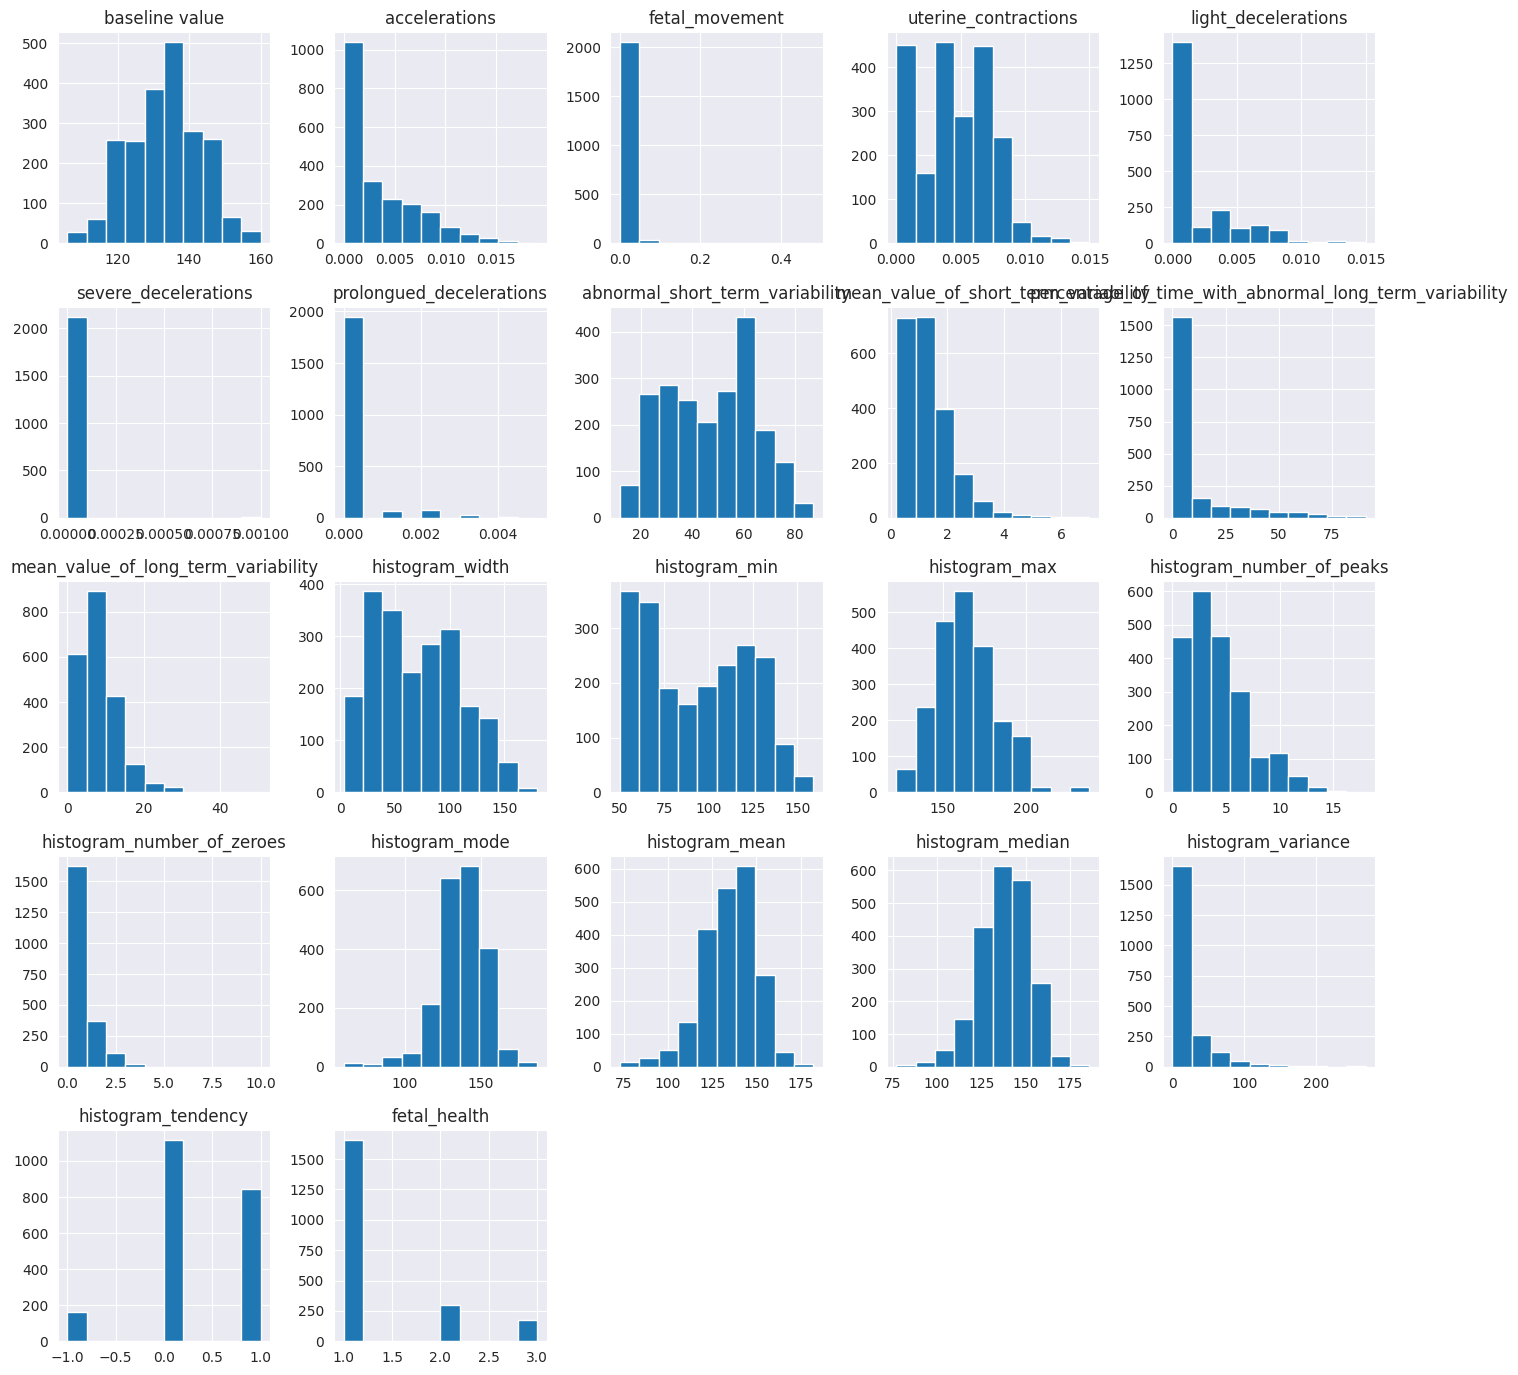

In [12]:
data.hist(figsize=(17,17),layout=(5,5),sharex=False)

**Bivariate Analysis**

<Axes: xlabel='fetal_movement', ylabel='fetal_health'>

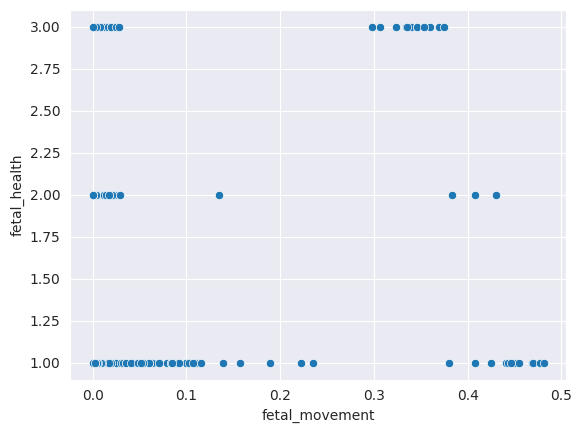

In [13]:
sns.scatterplot(x='fetal_movement',y='fetal_health',data=data)

**Multivariate analysis**



<Axes: >

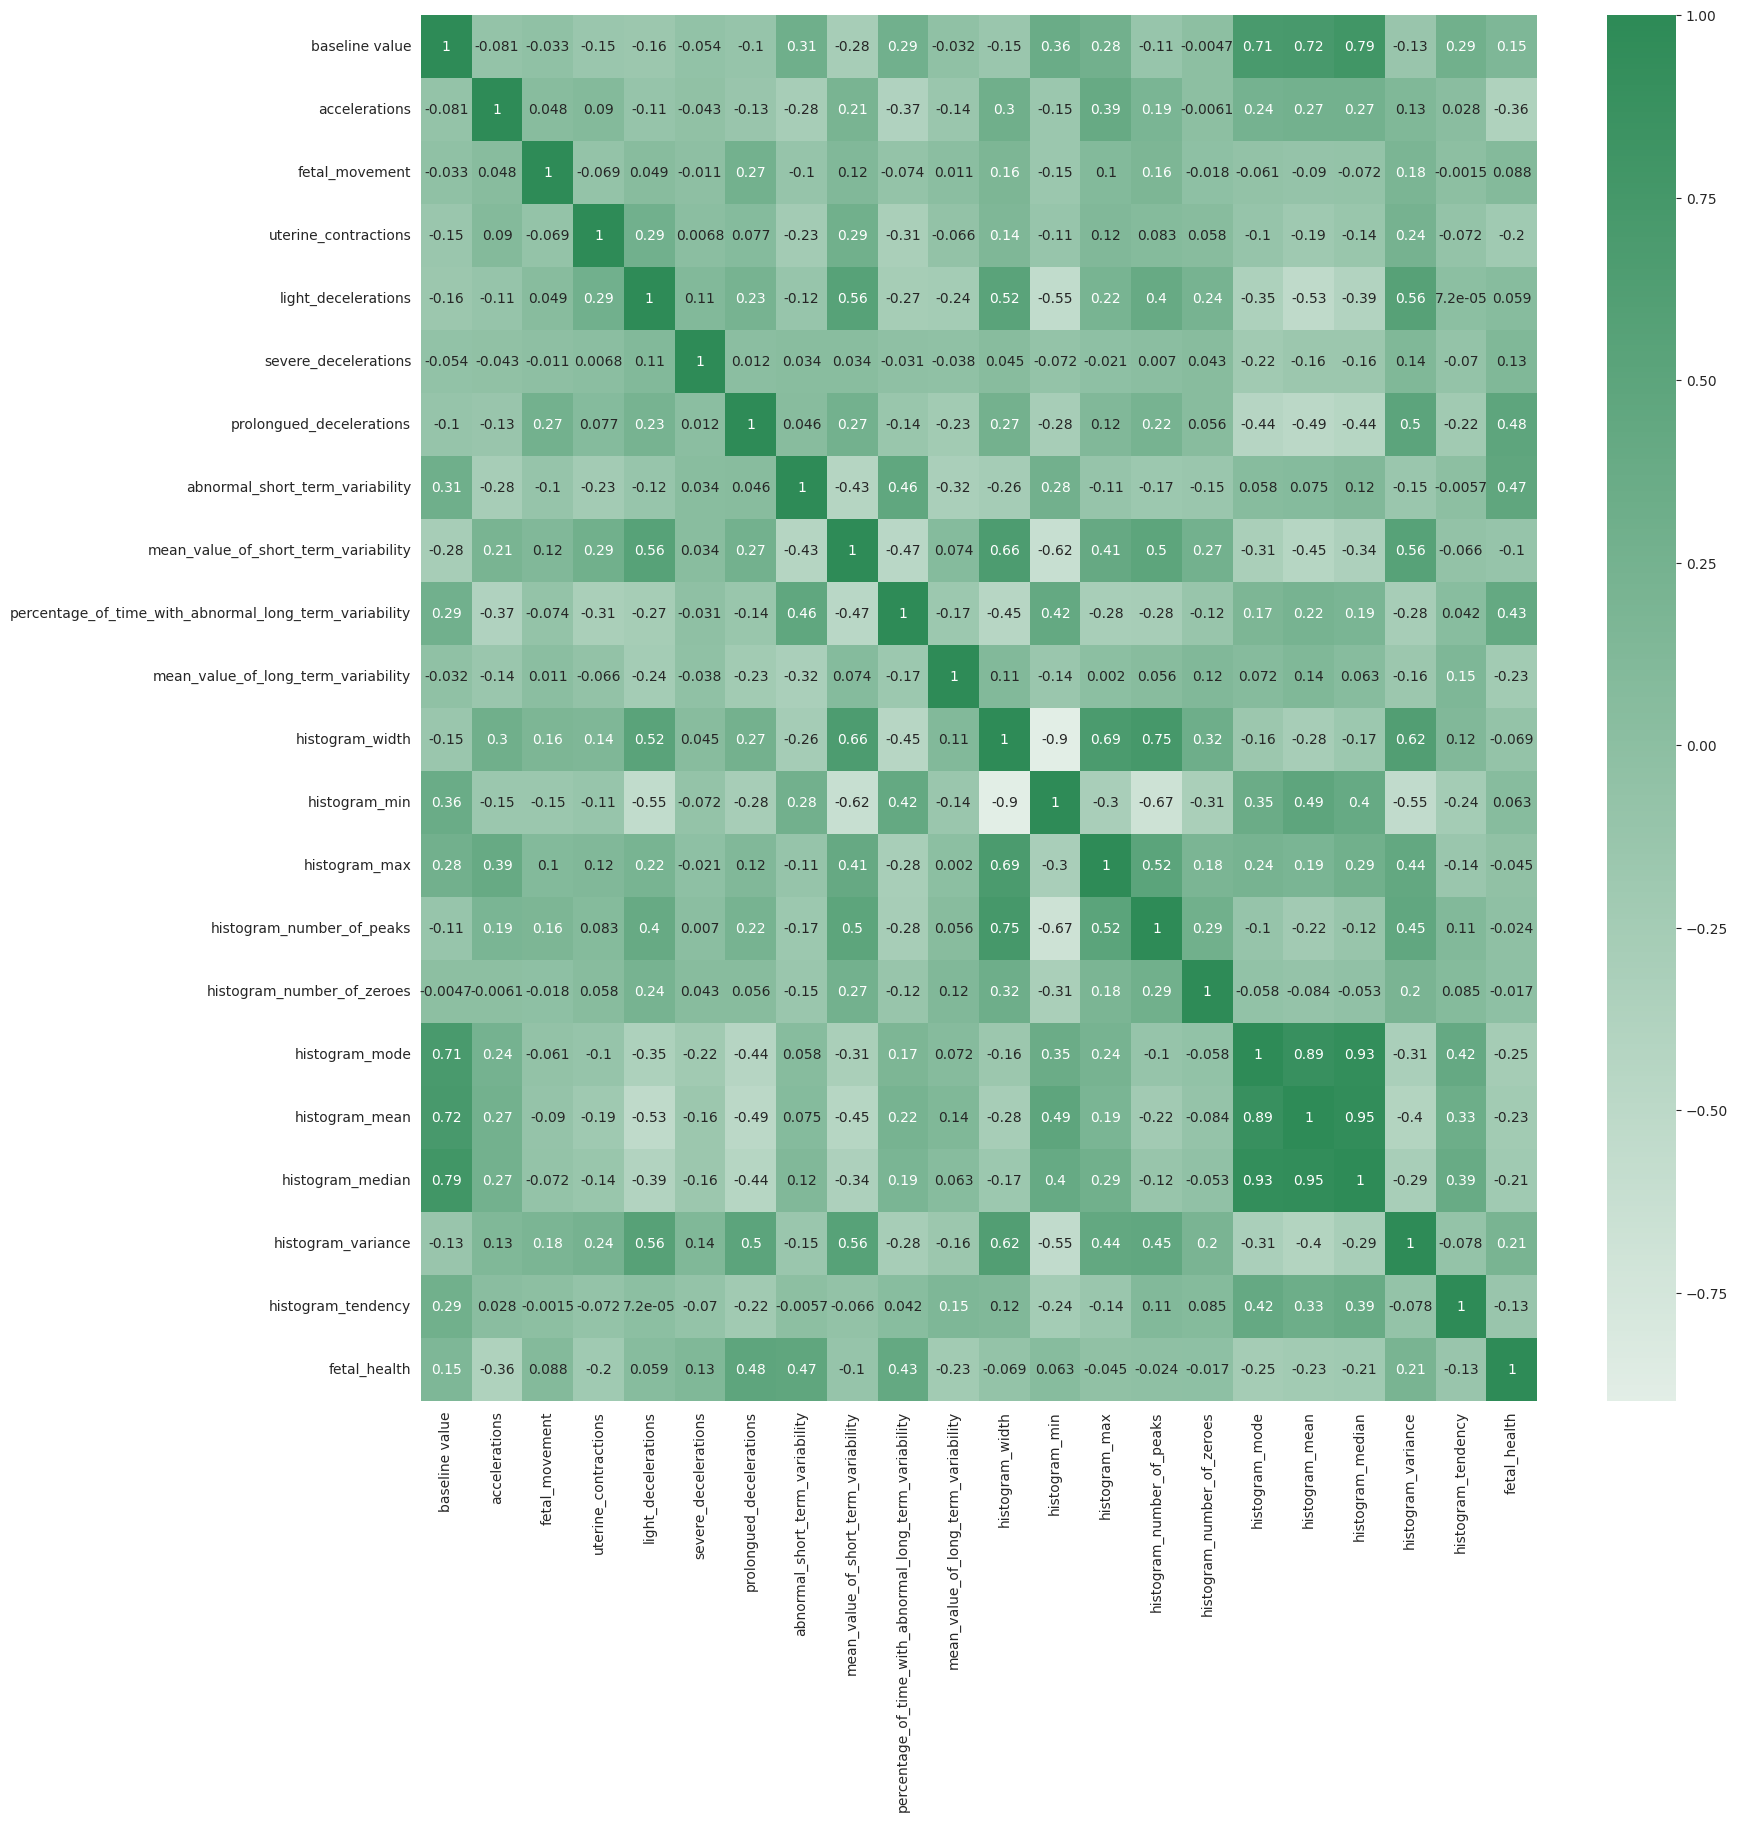

In [14]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(18,18))

cmap = sns.light_palette("seagreen",as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)


**Feature Selection**

In [15]:
data.drop(columns=['histogram_mean'],axis=1,inplace=True)

In [16]:
data.shape

(2126, 21)

In [17]:
data.corr()["fetal_health"].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [18]:
new_data=data.loc[:,["prolongued_decelerations","abnormal_short_term_variability",
"percentage_of_time_with_abnormal_long_term_variability"]]

In [19]:
new_data.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability
0,0.0,73.0,43.0
1,0.0,17.0,0.0
2,0.0,16.0,0.0
3,0.0,16.0,0.0
4,0.0,16.0,0.0


**Scaling Data**

In [20]:
x=data.drop(columns=['fetal_health'])
y=data["fetal_health"]
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_median,histogram_variance,histogram_tendency
0,0.259259,0.000000,0.0,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,0.047337,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.403670,0.271375,1.0
1,0.481481,0.315789,0.0,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,0.205128,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.044610,0.5
2,0.500000,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,0.264300,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.559633,0.048327,0.5
3,0.518519,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,0.453649,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.550459,0.048327,1.0
4,0.481481,0.368421,0.0,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,0.392505,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.559633,0.040892,1.0


In [21]:
data.shape

(2126, 21)

**Splitting data into Train and Test**

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape

((1488, 20), (638, 20))

**Applying SMOTE for balancing the Data**



In [60]:
!pip install imblearn

In [25]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()


In [26]:
x_train_smote,y_train_smote=smote.fit_resample(x_train.astype('float'),y_train)

In [27]:
print(x_train.columns)

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_median',
       'histogram_variance', 'histogram_tendency'],
      dtype='object')


In [28]:
from collections import Counter
print("Before SMOTE:",Counter(y_train))
print("After SMOTE:",Counter(y_train_smote))

Before SMOTE: Counter({1.0: 1159, 2.0: 194, 3.0: 135})
After SMOTE: Counter({1.0: 1159, 3.0: 1159, 2.0: 1159})


After applying SMOTE, the dataset is balanced. And now we will train the model after balancing the dataset to check the accuracy.



**Model Building**
*Training The Model In Multiple Algorithms*
Now our data is cleaned and it’s time to build the model. We can train our data on different algorithms. For this project we are applying four classification algorithms. The best model is saved based on its performance.


## **Random Forest Model**

A function named randomForest is created and train and test data are passed as the parameters. Inside the function, the RandomForestClassifier algorithm is initialized and training data is passed to the model with the .fit() function. Test data is predicted with .predict() function and saved in a new variable. For evaluating the model, a confusion matrix and classification report is done.



**Random Forest Model RF**

In [29]:
RF_model=RandomForestClassifier()
RF_model.fit(x_train_smote,y_train_smote)
predictions=RF_model.predict(x_test)
print(accuracy_score(y_test,predictions))

0.9420062695924765


For the amounts of training data is: 3477
Accuracy of RandomForestClassifier: 0.9420062695924765


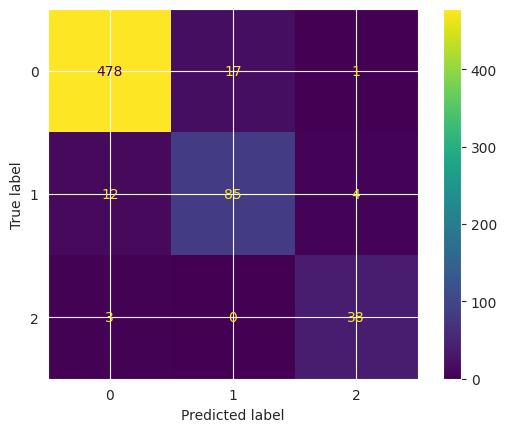

In [30]:
print("For the amounts of training data is:", x_train_smote.shape[0]) # Assuming you want to print the number of samples in the training data
print("Accuracy of RandomForestClassifier:",RF_model.score(x_test,y_test))
cm=confusion_matrix(y_test,predictions)
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.show()

In [31]:
!pip install scikit-learn
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97       496
         2.0       0.83      0.84      0.84       101
         3.0       0.88      0.93      0.90        41

    accuracy                           0.94       638
   macro avg       0.90      0.91      0.90       638
weighted avg       0.94      0.94      0.94       638



In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97       496
         2.0       0.83      0.84      0.84       101
         3.0       0.88      0.93      0.90        41

    accuracy                           0.94       638
   macro avg       0.90      0.91      0.90       638
weighted avg       0.94      0.94      0.94       638



In [33]:
confusion_matrix(y_test,predictions)

array([[478,  17,   1],
       [ 12,  85,   4],
       [  3,   0,  38]])

**Decision Tree**
A function named decisionTree is created and train and test data are passed as the parameters. Inside the function, DecisionTreeClassifier algorithm is initialized and training data is passed to the model with the .fit() function. Test data is predicted with .predict() function and saved in a new variable. For evaluating the model, a confusion matrix and classification report is done.

**Decision Tree DT**

In [34]:
DT_model=DecisionTreeClassifier()
DT_model.fit(x_train_smote,y_train_smote)
predictions=DT_model.predict(x_test)
print(accuracy_score(y_test,predictions))

0.9028213166144201


For the amounts of training data is: 3477
Accuracy of DecisionTreeClassifier: 0.9028213166144201


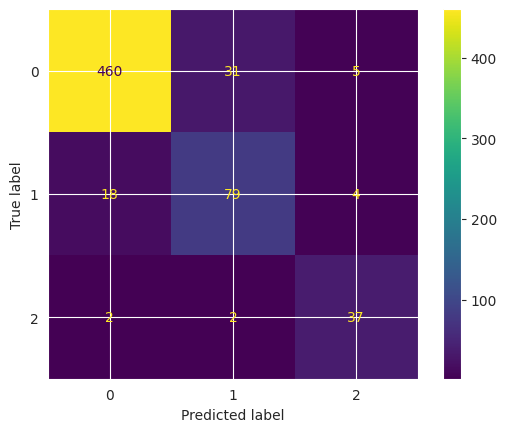

In [35]:
print("For the amounts of training data is:",x_train_smote.shape[0])
print("Accuracy of DecisionTreeClassifier:",DT_model.score(x_test,y_test))
cm=confusion_matrix(y_test,predictions)
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.show()

In [36]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

         1.0       0.96      0.93      0.94       496
         2.0       0.71      0.78      0.74       101
         3.0       0.80      0.90      0.85        41

    accuracy                           0.90       638
   macro avg       0.82      0.87      0.84       638
weighted avg       0.91      0.90      0.90       638



In [37]:
confusion_matrix(y_test,predictions)

array([[460,  31,   5],
       [ 18,  79,   4],
       [  2,   2,  37]])

***Logistic Regression***

A function named LogisticRegression() is created and train and test data are passed as the parameters. Inside the function, LogisticRegression algorithm is initialized and training data is passed to the model with the .fit() function. Test data is predicted with .predict() function and saved in a new variable. For evaluating the model, a confusion matrix and classification report is done.

**[Logistic Regression] LR**


In [38]:
LR_model=LogisticRegression()
LR_model.fit(x_train_smote,y_train_smote)
predictions=LR_model.predict(x_test)
print(accuracy_score(y_test,predictions))

0.780564263322884


For the amounts of training data is: 3477
Accuracy of LogisticRegression: 0.780564263322884


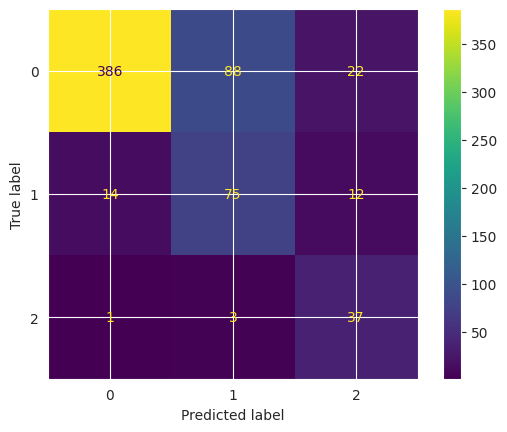

In [39]:
print("For the amounts of training data is:",x_train_smote.shape[0])
print("Accuracy of LogisticRegression:",LR_model.score(x_test,y_test))
cm=confusion_matrix(y_test,predictions)
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.show()

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.96      0.78      0.86       496
         2.0       0.45      0.74      0.56       101
         3.0       0.52      0.90      0.66        41

    accuracy                           0.78       638
   macro avg       0.65      0.81      0.69       638
weighted avg       0.85      0.78      0.80       638



In [41]:
confusion_matrix(y_test,predictions)

array([[386,  88,  22],
       [ 14,  75,  12],
       [  1,   3,  37]])

**K-Nearest Neighbors KNN**

A function named KNeighborsClassifier() is created and train and test data are passed as the parameters. Inside the function, KNeighbors algorithm is initialized and training data is passed to the model with the .fit() function. Test data is predicted with .predict() function and saved in a new variable. For evaluating the model, a confusion matrix and classification report is done.



**KNN K-Nearest Neighbors**

In [42]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train_smote,y_train_smote)
predictions=KNN_model.predict(x_test)
print(accuracy_score(y_test,predictions))

0.835423197492163


For the amounts of training data is: 3477
Accuracy of KNeighborsClassifier: 0.835423197492163


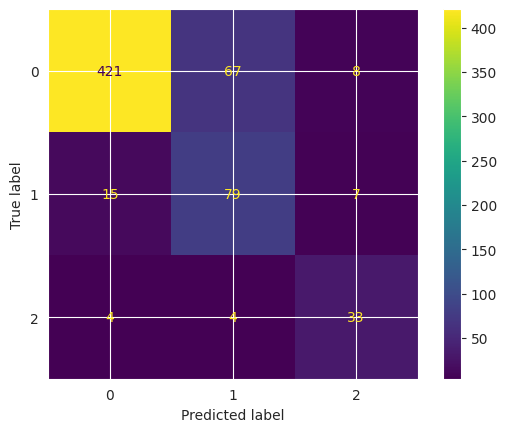

In [43]:
print("For the amounts of training data is:",x_train_smote.shape[0])
print("Accuracy of KNeighborsClassifier:",KNN_model.score(x_test,y_test))
cm=confusion_matrix(y_test,predictions)
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.show()

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.96      0.85      0.90       496
         2.0       0.53      0.78      0.63       101
         3.0       0.69      0.80      0.74        41

    accuracy                           0.84       638
   macro avg       0.72      0.81      0.76       638
weighted avg       0.87      0.84      0.85       638



In [45]:
confusion_matrix(y_test,predictions)

array([[421,  67,   8],
       [ 15,  79,   7],
       [  4,   4,  33]])

**Define the Decision tree Classifier**

In [46]:
dt_classifier = DecisionTreeClassifier()


**Define the hyperparameters and possible values**

In [47]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'splitter':['best','random']
}

**Define the Random Forest Classifier**

In [48]:
rf_classifier = RandomForestClassifier()

**Define the hyperparameters and possible values**

> Add blockquote



In [49]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
}

**Define the KNN KNeighborsClassifier**

In [50]:
knn_classifier = KNeighborsClassifier()

**Define the hyperparameters and possible values**

> Add blockquote



In [51]:
param_grid={
'n_neighbors': [3, 5, 7, 9, 11], # number of nearest neighbors to consider
'weights': ['uniform', 'distance'], # weight function to use
'p': [1, 2], # exponent for Minkowski distance
}


**Define the LogisticRegression**

In [52]:
lr_classifier = LogisticRegression()

Define the hyperparameters and posiible values

In [53]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],          # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use
    'max_iter': [100, 200, 500]                   # Maximum number of iterations
}

**Testing The Model**

In [54]:
RF_model.predict([[0.259259,	0.000000,	0.000000,	0.0	,0.813333,	0.044118,	0.472527,	0.047337,	0.344633,	0.110092,
                   0.034483,	0.111111	,0.0	,0.472441,	0.403670,	0.271375,	1.0,1,	0.481481	,0.315789,]])


array([1.])

In [55]:

RF_model.predict([[0.000,0.0,73.0,43.0,2.4,73.0,120.0,0.481481	,0.315789	,	0.400000	,
                   0.279412	,0.205128	,0.717514	,0.165138	,0.655172	,0.333333	,	0.637795	,0.577982	,0.044610,	0.5]])

array([1.])

Testing Model With Multiple Evaluation Metrics:
**Comparing the Model**


In [56]:
df=pd.DataFrame()
df['name']=['RandomForestClassifier','DecisionTreeClassifier','LogisticRegression','KNeighborsClassifier']
df['name']

df['score']=[RF_model.score(x_test,y_test),DT_model.score(x_test,y_test),LR_model.score(x_test,y_test),KNN_model.score(x_test,y_test)]
df['score']


0    0.942006
1    0.902821
2    0.780564
3    0.835423
Name: score, dtype: float64

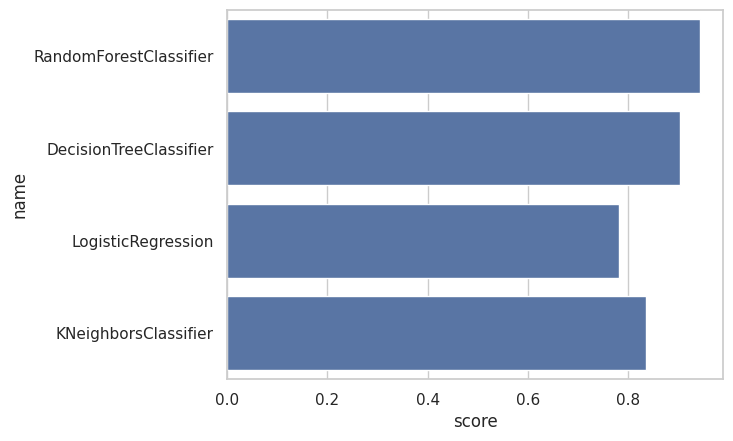

In [57]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

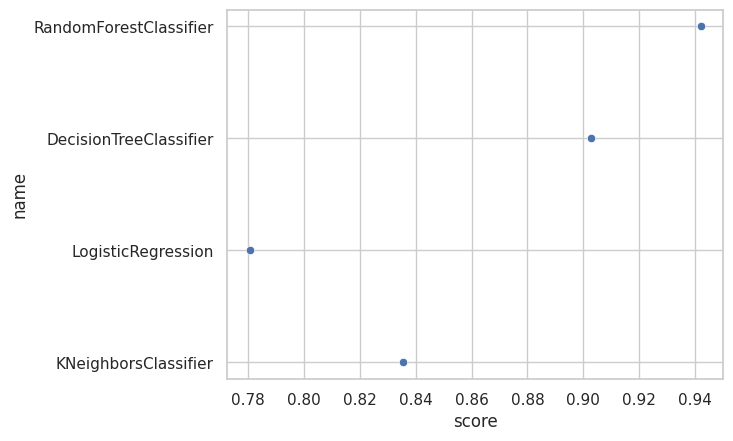

In [58]:
sns.set(style="whitegrid")
ax = sns.scatterplot(y="name", x="score", data=df)

## ***Model Deployment***
   Save The Best Model
   

In [59]:
#saving the model
import pickle
pickle.dump(RF_model,open('fetalhealth.pkl','wb'))